# Intermediate Machine Learning

In this notebook we will present some intermediate Machine Learning (ML) approaches and concepts.

In particular, we will learn:
- How to use pipelines and column transformers to simplify the data preprocessing steps
- How to evaluate our models
- How to fine-tune our models

## Pipelines and ColumnTranformers

Previously we have seen how to perform some basic preprocessing steps to a dataset. We have realized that it can be very tedious to apply to the test set the same preprocessing that we applied to the training set. We will learn how to simplify this process by grouping transformers through Pipelines and ColumnTransformers.

Let's start by loading the *Titanic* dataset:

In [1]:
import pandas

titanic = pandas.read_csv("https://hbiostat.org/data/repo/titanic.txt", index_col=0)

titanic.head()

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
row.names,,,,,,,,,,
1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [2]:
from sklearn.model_selection import train_test_split

titanic_X = titanic.drop("survived", axis=1)
titanic_y = titanic["survived"]

X_train, X_test, y_train, y_test = train_test_split(
    titanic_X, titanic_y, test_size=0.2, random_state=42)

Now, let's apply the same preprocessing that we have seen previously, but now using Pipelines and ColumnTransformers:

- Select a subset of the features
- Impute missing values by using different strategies for categorical and numerical features
- Encode categorical features

At the end we will also use a DecisionTreeClassifier to make our predictions.

[Pipeline documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline)

[ColumnTransformer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html?highlight=columntransformer#sklearn.compose.ColumnTransformer)

In [3]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

num = ["age"]
cat = ["pclass", "sex"]

predictor = Pipeline(
    [
        (
            "preprocessing", ColumnTransformer(
                [
                    (
                        "cat",
                        make_pipeline(
                            SimpleImputer(strategy="most_frequent"),
                            OneHotEncoder(sparse_output=False, drop="first"),
                        ),
                        cat
                    ),
                    ("num", SimpleImputer(strategy="mean"), num),
                ],
                remainder="drop",
            )
        ),
        ("predictor", DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=5)),
    ]
)

At this point we can fit our `predictor` Pipeline using the training set.

In [4]:
predictor.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['pclass', 'sex']),
                                                 ('num', SimpleImputer(),
                                                  ['age'])])),
                ('predictor',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=5))])

Notice that we did not preprocess our `X_train`! This is already done by our pipeline when we call the `fit` method.

Now, let's check which is our score in the training set and predict our test set!

In [7]:
print("Train score:", predictor.score(X_train, y_train))
y_test_pred = predictor.predict(X_test)
y_test_pred

Train score: 0.8295238095238096


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

Again, all the preprocessing defined in our pipeline is applied to the data automatically.

In general, when using pipelines, we do not have to worry about the `transform` method.

## Evaluation Metrics

We have seen how we can compute the accuracy score of a prediction. In particular, its mathematical formula would be:

$$accuracy(y, ŷ) = \frac{1}{n_{samples}} \sum_{i=0}^{n_{samples} - 1} 1(ŷ_i = y_i)$$

Now, imagine that we have the following $y$:

In [8]:
import numpy

y = numpy.array(([1] * 95) + ([0] * 5))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

Then, imagine that we came out with a model that obtains a **95% of accuracy!**

Nice! What a great result! Sure...

In [9]:
from sklearn.metrics import accuracy_score

y_pred = numpy.ones(100)
accuracy_score(y, y_pred)

0.95

It results that our *great* predictor was always predicting the same class, and as result of our unbalanced target we end up obtaining a 95% of accuracy.

This means that we cannot always base our model evaluation just on the basic accuracy score. In the next section we will discuss other alterative metrics that we can use to better evaluate our models.

But first we must understant what the *confusion matrix* is

### The Confusion Matrix

The Confusion Matrix is a visualization of the performance of a prediction in the following form:

![confusion matrix](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

**NOTE:** We will study the Confusion Matrix and its derived metrics using *binary* classification, but all these concepts can be easily extendened to *multilabel* classification.

Scikit-learn also provides a method to compute Confusion Matrices ([docu](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html))

In [10]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y, y_pred)
conf_matrix

array([[ 0,  5],
       [ 0, 95]])

A better representation (requires matplotlib):

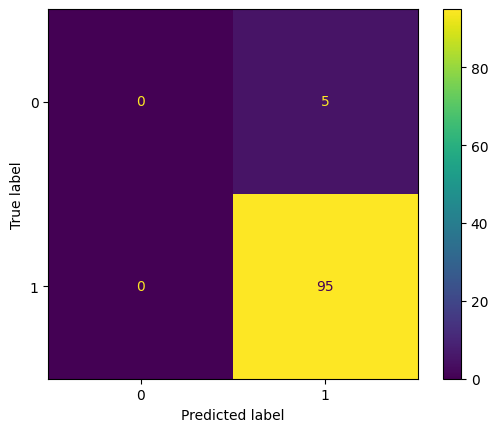

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()

### Balanced accuracy score

This metric is similar as the conventional accuracy score, but takes into account the class imbalance:

$$balanced-accuracy = \frac{1}{2}(\frac{TP}{TP + FN} + \frac{TN}{TN + FP})$$

In [14]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y, y_pred)

0.5

### Precision score

This metric measures the ability of the classifier not to label as positive a sample that is negative:

$$precision = \frac{TP}{TP + FP}$$

In [15]:
from sklearn.metrics import precision_score

precision_score(y, y_pred)

0.95

### Recall score or sensitivity

This metric measure he ability of the classifier to find all the positive samples:

$$recall = \frac{TP}{TP + FN}$$

In [ ]:
from sklearn.metrics import recall_score

recall_score(y, y_pred)

Now you can try to apply different metrics to our predictions in the *Titanic* dataset.

In [17]:
# Your code here
from sklearn.metrics import average_precision_score

average_precision_score(y,y_pred)


0.95

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.95

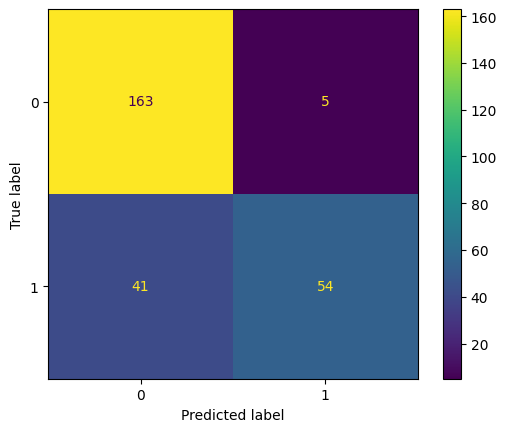

In [22]:
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf = confusion_matrix(y_test,y_test_pred)
jordi = ConfusionMatrixDisplay(conf)
jordi.plot()
plt.show()

## Evaluation approaches

Until now, we have only seen one *valid* approach to evaluate our models: the training-test split.

In this section we will review an alternative approach that is called *cross-validation*.

### Cross-validation

Sometimes we may want to use all the available data for training purposes. In this case splitting the dataset as we were doing until now will not be an option.

However, recall that we cannot evaluate our model using the same data that we used for training! We can take a mixed approach called **cross-validation**.

![Cross-validation](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

([source](https://scikit-learn.org/stable/modules/cross_validation.html))

This evaluation methodology is very common to evaluate the performance of different models over a dataset before applying them to the final testing data.

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(predictor, X_train, y_train, cv=10)

array([0.87619048, 0.81904762, 0.81904762, 0.77142857, 0.80952381,
       0.86666667, 0.80952381, 0.84761905, 0.75238095, 0.81904762])

## Fine-tuning

As you know, the models that we are using can expose many configurable parameters that can be fine-tuned.

This is an ardous task if we have to perform it by hand. Scikit-learn tries to simplify this process by providing the `GridSearchCV` and `RandomizedSearchCV` classes.

### GridSearchCV

This class will **exhaustively search** over all the specified parameter values for an estimator.

In [25]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "preprocessing__num__strategy": ("mean", "median"),
    "predictor__criterion": ("gini", "entropy"),
    "predictor__max_depth": (3, 5, 10),
    "predictor__min_samples_leaf": (5, 10, 20),
}

clf = GridSearchCV(predictor, parameters, cv=5)
clf.fit(X_train, y_train)

clf.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['pclass', 'sex']),
                                                 ('num', SimpleImputer(),
                                                  ['age'])])),
                ('predictor',
                 DecisionTreeClassifier(max_depth=3, min_samples_leaf=10))])

In [26]:
print("* Original test score:", predictor.score(X_test, y_test))
print("* GridSearchCV test score:", clf.best_estimator_.score(X_test, y_test))

* Original test score: 0.8250950570342205
* GridSearchCV test score: 0.8250950570342205


### RandomSearchCV

If we have a large amount of parameters and values, using `GridSearchCV` is unfeasible. We should take an imcomplete appoach instead, such as `RandomizedSearchCV`.

In [27]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    "preprocessing__num__strategy": ("mean", "median"),
    "predictor__criterion": ("gini", "entropy"),
    "predictor__max_depth": list(range(3, 20)),
    "predictor__min_samples_leaf": list(range(1, 100)),
}

clf = RandomizedSearchCV(predictor, parameters, cv=5, random_state=42)
clf.fit(X_train, y_train)

clf.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['pclass', 'sex']),
                                                 ('num', SimpleImputer(),
                                                  ['age'])])),
                ('predictor',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=6))])

In [28]:
print("* Original test score:", predictor.score(X_test, y_test))
print("* RandomizedSearchCV test score:", clf.best_estimator_.score(X_test, y_test))

* Original test score: 0.8250950570342205
* RandomizedSearchCV test score: 0.8326996197718631
